# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [29]:
import pandas as pd

df = pd.read_csv('/Users/johnxie301/Desktop/Data_Science_600/Assignment_5/churn_data_cleaned.csv', index_col='customerID')
df.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1
9305-CDSKC,8,1,0,0,99.65,820.50,1
1452-KIOVK,22,1,0,3,89.10,1949.40,0
6713-OKOMC,10,0,0,1,29.75,301.90,0
7892-POOKP,28,1,0,0,104.80,3046.05,1


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 2775-SEFEE
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 440.2+ KB


In [31]:
from pycaret.classification import ClassificationExperiment 

Comment: This took a while to run, pretty odd.

In [32]:
# set up the autoML model
automl = ClassificationExperiment()

In [33]:
#set the target column to 'churn'
automl.setup(df, target='Churn')

,Description,Value
0,Session id,7474
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 7)"
4,Transformed data shape,"(7043, 7)"
5,Transformed train set shape,"(4930, 7)"
6,Transformed test set shape,"(2113, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [75]:
automl

In [35]:
best_model = automl.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8000,0.8351,0.5337,0.6511,0.5856,0.4557,0.4602,0.4270
ada,Ada Boost Classifier,0.7992,0.8404,0.5291,0.6505,0.5824,0.4523,0.4571,0.0140
ridge,Ridge Classifier,0.7982,0.0000,0.4641,0.6747,0.5492,0.4250,0.4378,0.0040
lr,Logistic Regression,0.7968,0.8427,0.5329,0.6413,0.5816,0.4490,0.4527,0.1200
gbc,Gradient Boosting Classifier,0.7939,0.8422,0.5069,0.6416,0.5660,0.4334,0.4388,0.0350
lda,Linear Discriminant Analysis,0.7929,0.8293,0.5092,0.6386,0.5661,0.4324,0.4375,0.0040
rf,Random Forest Classifier,0.7748,0.8040,0.4932,0.5918,0.5375,0.3904,0.3936,0.0960
et,Extra Trees Classifier,0.7686,0.7821,0.4985,0.5747,0.5332,0.3805,0.3827,0.0330
knn,K Neighbors Classifier,0.7602,0.7452,0.4396,0.5633,0.4933,0.3394,0.3442,0.0670
qda,Quadratic Discriminant Analysis,0.7588,0.8340,0.7485,0.5329,0.6222,0.4525,0.4669,0.0040


Comment: This autoML gives clear chart on what model they use and how they score on accuracy, areas under the curve, percentage and etc.. It is overall a clear autoML. Also, the best accuracy result it gives are still the gbclassifier. 

In [36]:
# ask it to return the best model and its parameters
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7474, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [37]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Comment: This gives different kinds of visualizations of the model analysis. Amazing tool!

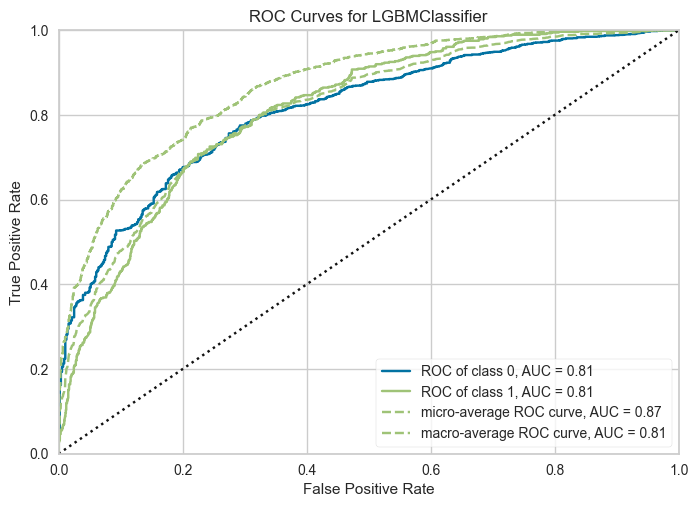

In [38]:

automl.plot_model(best_model)

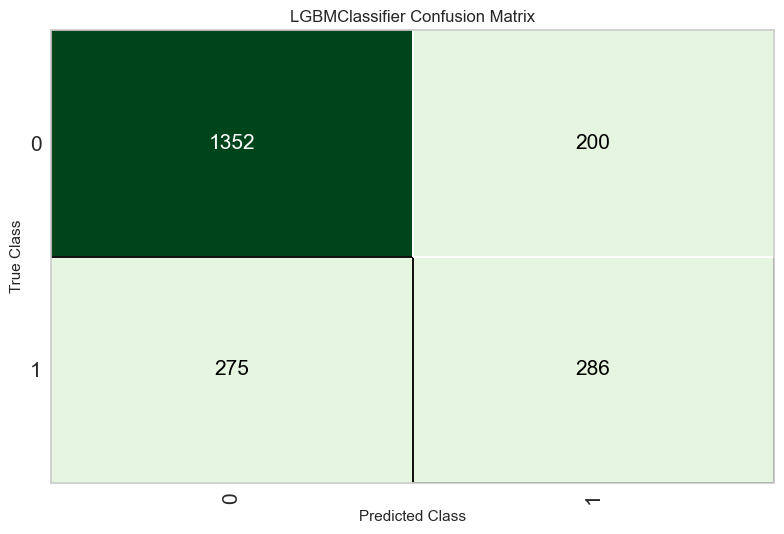

In [39]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [40]:
df.iloc[-2:-1].shape


(1, 7)

In [41]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
4075-WKNIU,0,1,2,1,73.349998,73.349998,0,0,0.9912


In [42]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8376,0.9016,0.6297,0.7225,0.6730,0.5656,0.5679


In [43]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,0,0,0,29.850000,29.850000,0,1,0.8476
5575-GNVDE,34,1,1,1,56.950001,1889.500000,0,0,0.9832
3668-QPYBK,2,1,0,1,53.849998,108.150002,1,0,0.5174
7795-CFOCW,45,0,1,2,42.299999,1840.750000,0,0,0.9906
9237-HQITU,2,1,0,0,70.699997,151.649994,1,1,0.5400


In [44]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                  LGBMClassifier(boostin

In [45]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [46]:
new_pycaret.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
4075-WKNIU,0,1,2,1,73.349998,73.349998,0,0,0.9912


In [72]:
from IPython.display import Code

Code('/Users/johnxie301/Desktop/Data_Science_600/Assignment_5/predict_churn_pycaret.py')
# the whole py file was recreated based on predict_diabetes_pycaret.py file. 

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'prediction_label': 'Churn'}, axis=1, inplace=True)
    predictions['Churn'].replace({1: 'Churn', 0: 'No churn'},
                                            inplace=True)
    return predictions['Churn']


if __name__ == "__main__":
    df = load_data('/Users/johnxie301/Desktop/Data_Science_600/Assignment_5/new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [74]:
#df1 = pd.read_csv('new_churn_data.csv',index_col='customerID')
#df1.head()

In [71]:
#There was something wrong with my py file when appling the new_churn_data, so I tested each line and found out the prediction label was not called label but is call prediction_label.
#classifier = ClassificationExperiment()
#model = classifier.load_model('pycaret_model')
#predictions = classifier.predict_model(model, data=df1)
#predictions.rename({'prediction_label': 'Churn'}, axis=1, inplace=True)
#predictions['Churn'].replace({1: 'Churn', 0: 'No churn'},inplace=True)
#predictions['Churn']



In [73]:
%run predict_churn_pycaret.py


Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
9305-CKSKC    No churn
1452-KNGVK    No churn
6723-OKKJM    No churn
7832-POPKP    No churn
6348-TACGU    No churn
Name: Churn, dtype: object


# Summary

Write a short summary of the process and results here.

Finishing this week's homework using pycaret is the most time consuming assignment I have done so far. Two main challenges I met was: Not able to create a virtual environment without using anaconda, have to create a py file by myself(Thought it would have something like tpot to export the whole thing to a py file).

Since I do not have anaconda on my pc, I decided to create a virtual environment in terminal. The first challenge I faced was not able to specify a python version when I create the virtual environment. My solution was download a python3.9 and use that one to create the virtual environment. The seond issue was not able to install pycaret in the virtual environment due to failure on building wheels for lightgbm. I have to install homebrew and use brew install lightgbm because somehow pip install lightgbm will pop out the same issue of failure on building wheels for lightgbm. Things gone much easier after I conquer these questions. 

The second challenge was not able to find a way to export the whole thing to py file. I understand it was automatically saveed as a pickle file. I was able to use the pickle file inside the editor. However, I did not download a pickle file editor. I am not sure if we were mentioned in class we can use the py file provided. But that's what I did. I used predict_diabetes_pycaret.py and changed this to a good to use py file for my data. I tested the new_churn_data using this py file. It was pretty easy to use.

Personal perspective on this two autoML: Convinence wise, I like TPOT more. It requires less effort and easy to store. However, it is more time consuming and have less features to play around(I have no dig into TPOT, I will spend some more time playing around to see if it will change my mind). Pycaret requires a virtual environment, it is more complicated to set up for the first time users. It is hard to store for people with not enough python knowledge to create a def function. However, it is really fast and gives a good comparsion and more visuals and aspects on analyzing different models. Overall, I would definitely choose pycaret as my knowledge grows. 